In [3]:
import numpy as np
from math import sqrt, exp, log
from random import gauss, seed
from time import time
import matplotlib.pyplot as plt

In [18]:
seed(40000)
t0 = time()

S0 = 100 # initial value
K  = 105 # strike price
T  =   1 # time to maturity
r  = 0.05 # risk-free interest rate.
σ  = 0.20 # volatility 

M = 50 # number of time steps in my simulation
dt = T / M # size of time step.
I = 50000 # number of paths to simulate

S = []
for i in range(I):
    path = []
    for t in range(M+1):
        if t==0:
            path.append(S0)
        else:
            z = gauss(0,1)
            St = path[-1]*exp((r-σ**2/2)*dt + σ*z*sqrt(dt))
            path.append(St)
    S.append(path)
    
C0 = exp(-r*T)*sum([max(path[-1]-K,0) for path in S]) / I

tpy = time() -  t0
print("European Option Value %7.3f" % C0)
print("Duration (seconds)  %7.3f" % tpy)

European Option Value   8.014
Duration (seconds)    6.384


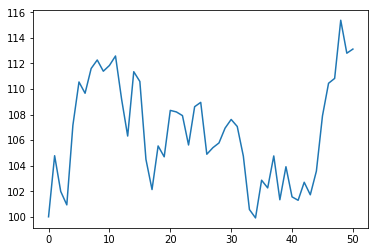

In [5]:
plt.plot(S[1])

In [9]:
max(S[0][-1]-K,0)

0

In [15]:
tmp = exp(-r*T)*sum([max(path[-1]-K,0) for path in S]) / I
tmp

8.036044799547048

In [24]:
np.random.seed(40000)
t0 = time()

S0 = 100 # initial value
K  = 105 # strike price
T  =   1 # time to maturity
r  = 0.05 # risk-free interest rate.
σ  = 0.20 # volatility 

M = 50 # number of time steps in my simulation
dt = T / M # size of time step.
I = 50000 # number of paths to simulate

S = np.empty((M+1,I))
S[0] = S0
for t in range(1,M+1):
    z = np.random.standard_normal(I)
    S[t] = S[t-1]*np.exp((r-0.5*σ**2)*dt + σ*z*sqrt(dt))
    
C0 = exp(-r*T)*np.sum(np.maximum(S[-1]-K,0)) / I

tpy = time() -  t0
print("European Option Value %7.3f" % C0)
print("Duration (seconds)  %7.3f" % tpy)

European Option Value   8.056
Duration (seconds)    0.443
